In [48]:

import pandas as pd
import functools as ft
from functools import reduce 

In [49]:
! ls /Users/amalseby/Desktop/IN

Linh_project.ipynb    edstays.csv           notes.docx
Untitled.ipynb        icd9toicd10cmgem.csv  primary(1).ipynb
Untitled1.ipynb       icd_code_new.csv      pyxis.csv
Untitled2.ipynb       intial_analysis.ipynb triage.csv
diagnosis.csv         medrecon.csv          vitalsign.csv


In [50]:
import pandas as pd

def look_n_load(path):
    df = pd.read_csv(path)
    print('\nShape:', df.shape)
    print('\nColumns:', list(df.columns))
#     print('\n',df.describe())
    print('\nMissing proportions:\n', df.isna().sum()/len(df))
    return df

In [51]:
diagnosis = look_n_load('/Users/amalseby/Desktop/IN/diagnosis.csv')
diagnosis.head()


Shape: (946692, 6)

Columns: ['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version', 'icd_title']

Missing proportions:
 subject_id     0.0
stay_id        0.0
seq_num        0.0
icd_code       0.0
icd_version    0.0
icd_title      0.0
dtype: float64


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,7070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [52]:
edstays = look_n_load('/Users/amalseby/Desktop/IN/edstays.csv')
edstays.head()




Shape: (447712, 9)

Columns: ['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender', 'race', 'arrival_transport', 'disposition']

Missing proportions:
 subject_id           0.000000
hadm_id              0.522213
stay_id              0.000000
intime               0.000000
outtime              0.000000
gender               0.000000
race                 0.000000
arrival_transport    0.000000
disposition          0.000000
dtype: float64


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,6/5/2180 19:17,6/5/2180 23:30,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,26/6/2180 15:54,26/6/2180 21:31,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,5/8/2180 20:58,6/8/2180 1:44,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,22/7/2180 16:24,23/7/2180 5:54,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,23/7/2180 5:54,23/7/2180 14:00,F,WHITE,AMBULANCE,ADMITTED


In [53]:
medrecon = look_n_load('/Users/amalseby/Desktop/IN/medrecon.csv')
medrecon.head()


Shape: (3143791, 9)

Columns: ['subject_id', 'stay_id', 'charttime', 'name', 'gsn', 'ndc', 'etc_rn', 'etccode', 'etcdescription']

Missing proportions:
 subject_id        0.000000
stay_id           0.000000
charttime         0.000000
name              0.000000
gsn               0.000000
ndc               0.000000
etc_rn            0.000000
etccode           0.003938
etcdescription    0.003938
dtype: float64


,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,2180-07-22 17:26:00,albuterol sulfate,28090,21695042308,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,2180-07-22 17:26:00,calcium carbonate,1340,10135021101,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,2180-07-22 17:26:00,cholecalciferol (vitamin D3),65241,37205024678,1,670.0,Vitamins - D Derivatives
3,10000032,32952584,2180-07-22 17:26:00,emtricitabine-tenofovir [Truvada],57883,35356007003,1,5849.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,32952584,2180-07-22 17:26:00,fluticasone [Flovent HFA],21251,49999061401,1,371.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


In [54]:
pyxis = look_n_load('/Users/amalseby/Desktop/IN/pyxis.csv')
pyxis.head()


Shape: (1670590, 7)

Columns: ['subject_id', 'stay_id', 'charttime', 'med_rn', 'name', 'gsn_rn', 'gsn']

Missing proportions:
 subject_id    0.000000
stay_id       0.000000
charttime     0.000000
med_rn        0.000000
name          0.000000
gsn_rn        0.000000
gsn           0.022311
dtype: float64


,subject_id,stay_id,charttime,med_rn,name,gsn_rn,gsn
0,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,1,5037.0
1,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,2,28090.0
2,10000032,35968195,2180-08-05 22:29:00,1,Morphine,1,4080.0
3,10000032,35968195,2180-08-05 22:55:00,2,Donnatol (Elixir),1,4773.0
4,10000032,35968195,2180-08-05 22:55:00,3,Aluminum-Magnesium Hydrox.-Simet,1,2701.0


In [55]:
triage = look_n_load('/Users/amalseby/Desktop/IN/triage.csv')
triage.head()


Shape: (447712, 11)

Columns: ['subject_id', 'stay_id', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint']

Missing proportions:
 subject_id        0.000000
stay_id           0.000000
temperature       0.054935
heartrate         0.040111
resprate          0.047743
o2sat             0.048355
sbp               0.042941
dbp               0.044823
pain              0.030415
acuity            0.016368
chiefcomplaint    0.000051
dtype: float64


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [56]:
vitalsign = look_n_load('/Users/amalseby/Desktop/IN/vitalsign.csv')
vitalsign.head()


Shape: (1646976, 11)

Columns: ['subject_id', 'stay_id', 'charttime', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'rhythm', 'pain']

Missing proportions:
 subject_id     0.000000
stay_id        0.000000
charttime      0.000000
temperature    0.360779
heartrate      0.044546
resprate       0.057115
o2sat          0.086914
sbp            0.051936
dbp            0.051936
rhythm         0.961874
pain           0.283495
dtype: float64


,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


## Length of stay analysis


In [57]:
# creating length of stay variable
edstays['intime'] = pd.to_datetime(edstays['intime'], errors='coerce')
edstays['outtime'] = pd.to_datetime(edstays['outtime'], errors='coerce')
edstays['length_of_stay'] = edstays['outtime'] - edstays['intime']
edstays


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0 days 05:37:00
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,30 days 04:46:00
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0 days 13:30:00
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0 days 08:06:00
...,...,...,...,...,...,...,...,...,...,...
447707,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 06:48:00
447708,19999828,25744818.0,32917002,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00
447709,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00
447710,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED,0 days 00:15:00


In [58]:
# 

res = diagnosis.merge( edstays, how='inner', left_on=['subject_id', 'stay_id'], right_on=['subject_id', 'stay_id'])
res

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0 days 13:30:00
1,10000032,32952584,2,7070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0 days 13:30:00
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0 days 13:30:00
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",22595853.0,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00
4,10000032,33258284,2,78959,9,OTHER ASCITES,22595853.0,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946687,19999828,30712109,1,K632,10,Fistula of intestine,29734428.0,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00
946688,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...,25744818.0,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00
946689,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...,25744818.0,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00
946690,19999914,32002659,1,R4182,10,"Altered mental status, unspecified",NaN,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED,0 days 00:15:00


In [59]:
# top 5 icd codes
res["icd_code"].value_counts()


4019      28300
I10       22346
R079      13727
78650     13084
25000     12691
          ...  
83319         1
99656         1
L89220        1
L89890        1
80425         1
Name: icd_code, Length: 13404, dtype: int64

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

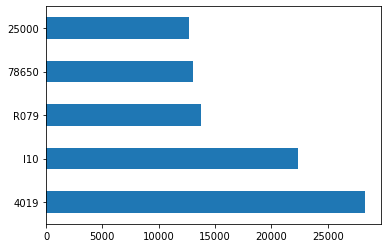

In [61]:

top_5_icd_code=res['icd_code'].value_counts()[:5].plot(kind='barh')



In [62]:
# 
df1 = res[res['icd_code'].map(res['icd_code'].value_counts()) > 12690]
df1

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay
42,10000285,36555703,4,I10,10,Essential (primary) hypertension,NaN,2161-08-11 14:19:00,2161-08-11 21:06:00,M,OTHER,WALK IN,HOME,0 days 06:47:00
53,10000635,31767754,3,I10,10,Essential (primary) hypertension,NaN,2138-09-29 10:54:00,2138-09-29 16:53:00,F,BLACK/AFRICAN AMERICAN,WALK IN,HOME,0 days 05:59:00
67,10000898,30017875,1,78650,9,CHEST PAIN NOS,NaN,2188-03-13 13:32:00,2188-03-13 20:44:00,F,WHITE,WALK IN,HOME,0 days 07:12:00
84,10000980,30905710,3,25000,9,DIABETES UNCOMPL ADULT,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 02:17:00
86,10000980,30905710,5,4019,9,HYPERTENSION NOS,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 02:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946580,19998350,36646275,1,R079,10,"Chest pain, unspecified",NaN,2135-01-01 14:27:00,2135-01-01 21:55:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 07:28:00
946591,19998350,39259698,5,I10,10,Essential (primary) hypertension,NaN,2136-02-22 04:27:00,2136-02-22 10:53:00,M,BLACK/AFRICAN AMERICAN,WALK IN,HOME,0 days 06:26:00
946619,19998497,35230154,1,78650,9,CHEST PAIN NOS,21557581.0,2145-07-24 17:30:00,2145-07-25 00:50:00,F,WHITE,AMBULANCE,ADMITTED,0 days 07:20:00
946650,19999145,35847469,3,I10,10,Essential (primary) hypertension,NaN,2185-05-24 23:37:00,2185-05-25 05:43:00,M,WHITE - OTHER EUROPEAN,WALK IN,HOME,0 days 06:06:00


<AxesSubplot:xlabel='icd_code', ylabel='Count'>

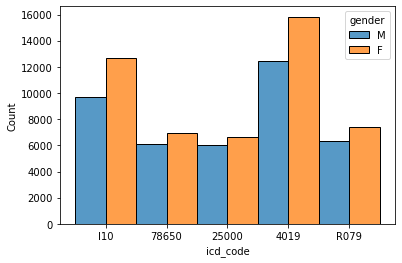

In [63]:
sns.histplot(binwidth=1,
            x="icd_code",
            hue="gender",
            data=df1,
            stat="count",
            multiple="dodge")

In [64]:
# 
df2 = df1[df1['race'].map(df1['race'].value_counts()) > 2000]
df2

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay
42,10000285,36555703,4,I10,10,Essential (primary) hypertension,NaN,2161-08-11 14:19:00,2161-08-11 21:06:00,M,OTHER,WALK IN,HOME,0 days 06:47:00
53,10000635,31767754,3,I10,10,Essential (primary) hypertension,NaN,2138-09-29 10:54:00,2138-09-29 16:53:00,F,BLACK/AFRICAN AMERICAN,WALK IN,HOME,0 days 05:59:00
67,10000898,30017875,1,78650,9,CHEST PAIN NOS,NaN,2188-03-13 13:32:00,2188-03-13 20:44:00,F,WHITE,WALK IN,HOME,0 days 07:12:00
84,10000980,30905710,3,25000,9,DIABETES UNCOMPL ADULT,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 02:17:00
86,10000980,30905710,5,4019,9,HYPERTENSION NOS,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 02:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946571,19998350,32237509,3,4019,9,HYPERTENSION NOS,27108332.0,2128-02-21 08:08:00,2128-02-21 09:42:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 01:34:00
946580,19998350,36646275,1,R079,10,"Chest pain, unspecified",NaN,2135-01-01 14:27:00,2135-01-01 21:55:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 07:28:00
946591,19998350,39259698,5,I10,10,Essential (primary) hypertension,NaN,2136-02-22 04:27:00,2136-02-22 10:53:00,M,BLACK/AFRICAN AMERICAN,WALK IN,HOME,0 days 06:26:00
946619,19998497,35230154,1,78650,9,CHEST PAIN NOS,21557581.0,2145-07-24 17:30:00,2145-07-25 00:50:00,F,WHITE,AMBULANCE,ADMITTED,0 days 07:20:00


<AxesSubplot:xlabel='icd_code', ylabel='Count'>

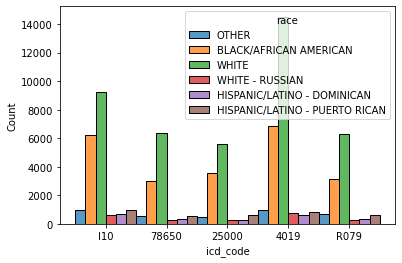

In [65]:
sns.histplot(binwidth=1,
            x="icd_code",
            hue="race",
            data=df2,
            stat="count",
            multiple="dodge")

In [66]:
# converting length of stay column to days
df2["length_of_stay"]=df2['length_of_stay'].astype('timedelta64[D]')
df2["length_of_stay"].value_counts()
df2



/var/folders/xk/hgz_3qtx1nnfdktnhybr14k80000gn/T/ipykernel_1829/3576861993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["length_of_stay"]=df2['length_of_stay'].astype('timedelta64[D]')


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay
42,10000285,36555703,4,I10,10,Essential (primary) hypertension,NaN,2161-08-11 14:19:00,2161-08-11 21:06:00,M,OTHER,WALK IN,HOME,0.0
53,10000635,31767754,3,I10,10,Essential (primary) hypertension,NaN,2138-09-29 10:54:00,2138-09-29 16:53:00,F,BLACK/AFRICAN AMERICAN,WALK IN,HOME,0.0
67,10000898,30017875,1,78650,9,CHEST PAIN NOS,NaN,2188-03-13 13:32:00,2188-03-13 20:44:00,F,WHITE,WALK IN,HOME,0.0
84,10000980,30905710,3,25000,9,DIABETES UNCOMPL ADULT,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0
86,10000980,30905710,5,4019,9,HYPERTENSION NOS,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946571,19998350,32237509,3,4019,9,HYPERTENSION NOS,27108332.0,2128-02-21 08:08:00,2128-02-21 09:42:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0
946580,19998350,36646275,1,R079,10,"Chest pain, unspecified",NaN,2135-01-01 14:27:00,2135-01-01 21:55:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0
946591,19998350,39259698,5,I10,10,Essential (primary) hypertension,NaN,2136-02-22 04:27:00,2136-02-22 10:53:00,M,BLACK/AFRICAN AMERICAN,WALK IN,HOME,0.0
946619,19998497,35230154,1,78650,9,CHEST PAIN NOS,21557581.0,2145-07-24 17:30:00,2145-07-25 00:50:00,F,WHITE,AMBULANCE,ADMITTED,0.0


In [67]:
# removed negative days. gropued length of stay column as stay
df2.loc[df2['length_of_stay'].between(0,3), 'stay'] = '0-3 days'
df2.loc[df2['length_of_stay'].between(3,6), 'stay'] = '3-6 days'
df2.loc[df2['length_of_stay'].between(6,9), 'stay'] = '6-9 days'
df2.loc[df2['length_of_stay'].between(9,12), 'stay'] = '9-12 days'
df2.loc[df2['length_of_stay'].between(12,15), 'stay'] = '12-15 days'
df2.loc[df2['length_of_stay'].between(15,18), 'stay'] = '15-18'
df2.loc[df2['length_of_stay'].between(18,21), 'stay'] = '18-21'
df2.loc[df2['length_of_stay']>21, 'stay'] = '21 plus days'
df2["stay"].value_counts()
df2["disposition"].value_counts()



/var/folders/xk/hgz_3qtx1nnfdktnhybr14k80000gn/T/ipykernel_1829/1255305714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['length_of_stay'].between(0,3), 'stay'] = '0-3 days'


HOME                           51048
ADMITTED                       22139
TRANSFER                        1060
ELOPED                           971
LEFT AGAINST MEDICAL ADVICE      691
LEFT WITHOUT BEING SEEN          454
OTHER                            353
EXPIRED                           40
Name: disposition, dtype: int64

<AxesSubplot:xlabel='stay', ylabel='Count'>

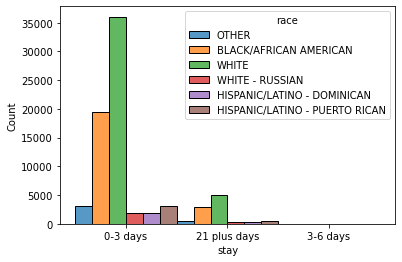

In [68]:
sns.histplot(binwidth=1,
            x="stay",
            hue="race",
            data=df2,
            stat="count",
            multiple="dodge")

<AxesSubplot:xlabel='stay', ylabel='Count'>

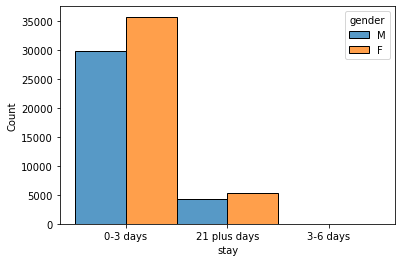

In [69]:
sns.histplot(binwidth=1,
            x="stay",
            hue="gender",
            data=df2,
            stat="count",
            multiple="dodge")

In [70]:
df3=df2[(df2.disposition == "ADMITTED") | (df2.disposition == 'TRANSFER')]
df3

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay,stay
84,10000980,30905710,3,25000,9,DIABETES UNCOMPL ADULT,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
86,10000980,30905710,5,4019,9,HYPERTENSION NOS,26913865.0,2189-06-27 06:25:00,2189-06-27 08:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
100,10000980,34277585,5,4019,9,HYPERTENSION NOS,29654838.0,2188-03-01 12:23:00,2188-03-01 18:42:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
102,10000980,35392246,2,78650,9,CHEST PAIN NOS,24947999.0,2190-06-11 15:30:00,2190-06-11 23:16:00,F,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
132,10001176,39677610,5,25000,9,DIABETES UNCOMPL ADULT,23334588.0,2186-11-28 21:34:00,2186-11-29 05:01:00,F,WHITE,WALK IN,ADMITTED,0.0,0-3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946569,19998350,32237509,1,78650,9,CHEST PAIN NOS,27108332.0,2128-02-21 08:08:00,2128-02-21 09:42:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
946570,19998350,32237509,2,25000,9,DIABETES UNCOMPL ADULT,27108332.0,2128-02-21 08:08:00,2128-02-21 09:42:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
946571,19998350,32237509,3,4019,9,HYPERTENSION NOS,27108332.0,2128-02-21 08:08:00,2128-02-21 09:42:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days
946580,19998350,36646275,1,R079,10,"Chest pain, unspecified",NaN,2135-01-01 14:27:00,2135-01-01 21:55:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0.0,0-3 days


<AxesSubplot:xlabel='stay', ylabel='Count'>

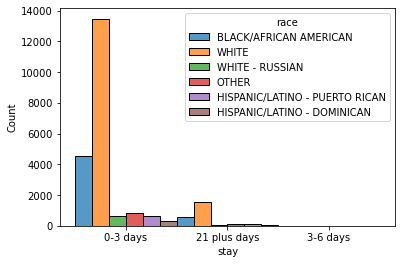

In [71]:
sns.histplot(binwidth=1,
            x="stay",
            hue="race",
            data=df3,
            stat="count",
            multiple="dodge")